In [21]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.experimental.output_all_intermediates(True)
from keras.applications import ResNet152
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras import backend as K

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from glob import glob

from utils_cv.similarity.data import Urls
from utils_cv.common.data import unzip_url

In [13]:
import fastai
print(f"Fast.ai version = {fastai.__version__}")

Fast.ai version = 2.0.10


In [6]:
model_res = ResNet152(weights="imagenet", include_top=False, pooling='avg')

def load_image(image_path):
    image = load_img(image_path, target_size=(224,224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    return image

def predict(model, image_path):
    image = load_image(image_path)
    return model.predict(image)

In [7]:
predict(model_res, "imgs/1.png")

array([[0.03061284, 0.18128711, 0.5147286 , ..., 0.5300417 , 0.64169264,
        1.8828745 ]], dtype=float32)

In [38]:
data_root_dir = unzip_url(Urls.fridge_objects_retrieval_path, exist_ok = True)
imgs_path = glob(data_root_dir+"/train/water_bottle/*.jpg")

In [46]:
resnet_features = np.vstack([predict(model_res, i)[0] for i in imgs_path])
resnet_features.shape

(33, 2048)

(-0.5, 498.5, 664.5, -0.5)

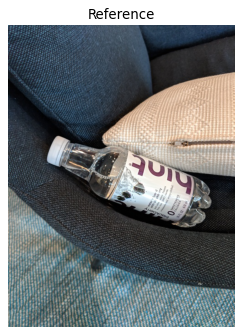

In [52]:
f, ax = plt.subplots(1, 1, figsize=(10,5), dpi=80)
ax.set_title("Reference")
ax.imshow(plt.imread(imgs_path[0]))
ax.axis('off')

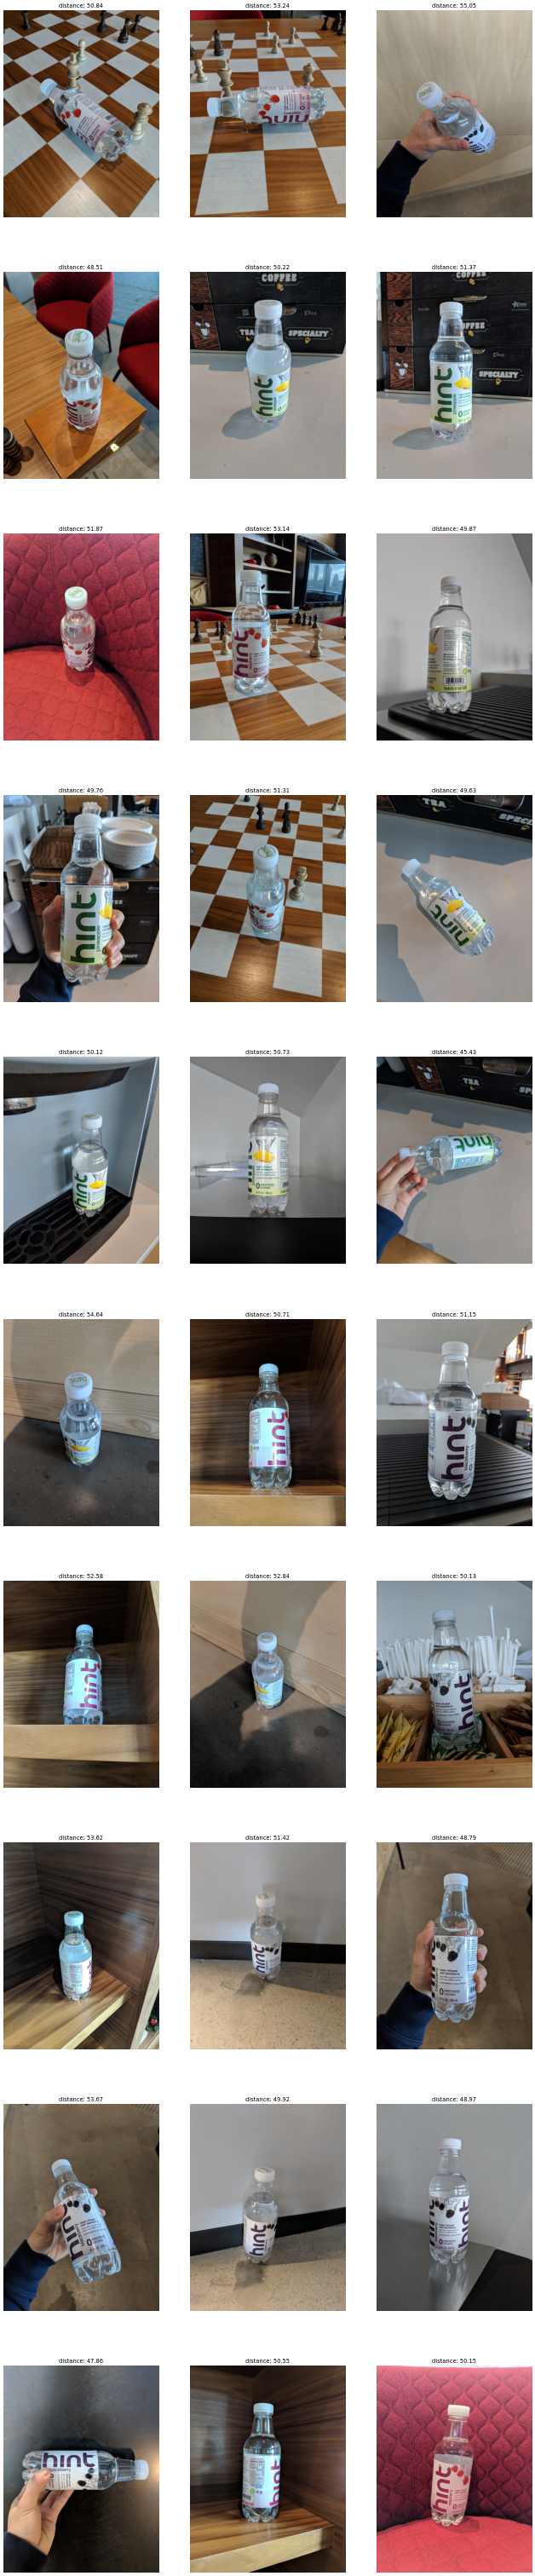

In [65]:
f, ax = plt.subplots(10, 3, figsize=(20,100), dpi=40)
for i in range(10):
    for j in range(3):
        ax[i][j].set_title("distance: {:.2f}".format(np.linalg.norm(resnet_features[0] - resnet_features[i*3+j+1])))
        ax[i][j].imshow(plt.imread(imgs_path[i*3+j+1]))
        ax[i][j].axis('off')